### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [27]:
data = pd.read_csv('data/coupons.csv')

In [29]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [34]:
data.shape

(12684, 26)

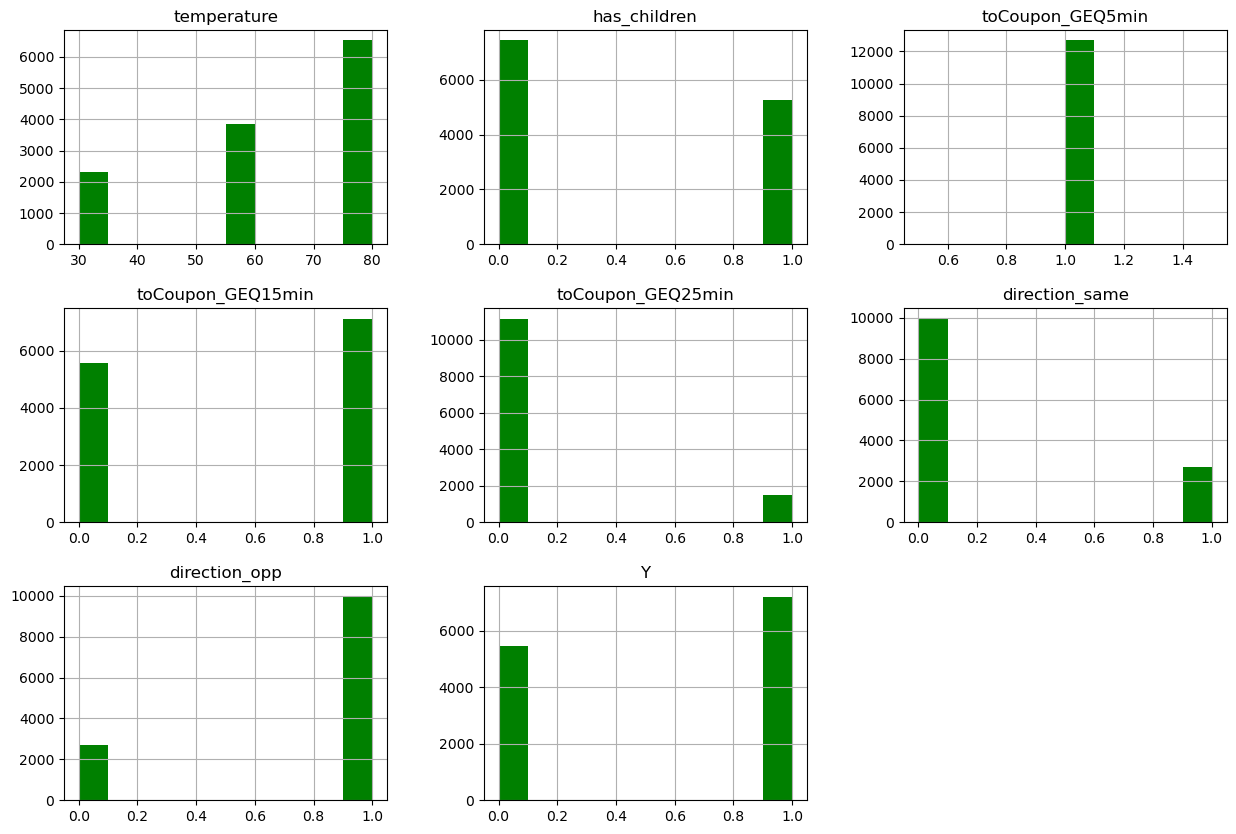

In [36]:
data.hist(figsize=(15,10), color='green');

In [38]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [40]:
print('Percent of missing "car" records is %.2f%%' %((data['car'].isnull().sum()/data.shape[0])*100))

Percent of missing "car" records is 99.15%


In [42]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

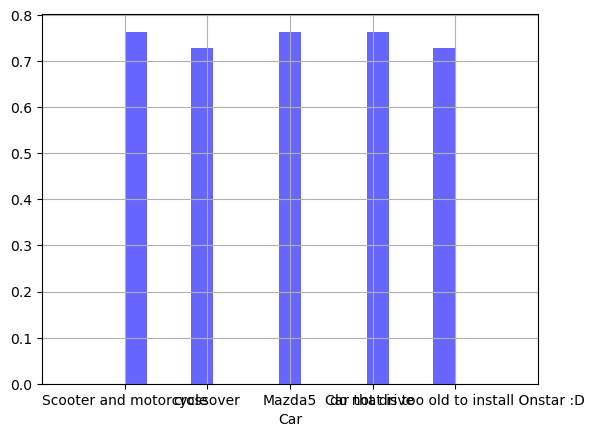

In [44]:
ax = data["car"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.6)
ax.set(xlabel='Car')
plt.xlim(-1,5)
plt.show()

In [46]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [48]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [50]:
data.replace('1~3', '1-3').replace('4~8', '4-8').replace('less1','never').replace('gt8', '8+')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4-8,1-3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4-8,1-3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4-8,1-3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4-8,1-3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4-8,1-3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1-3,4-8,1-3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1-3,4-8,1-3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1-3,4-8,1-3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1-3,4-8,1-3,1,1,1,0,1,0


In [52]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

<Axes: >

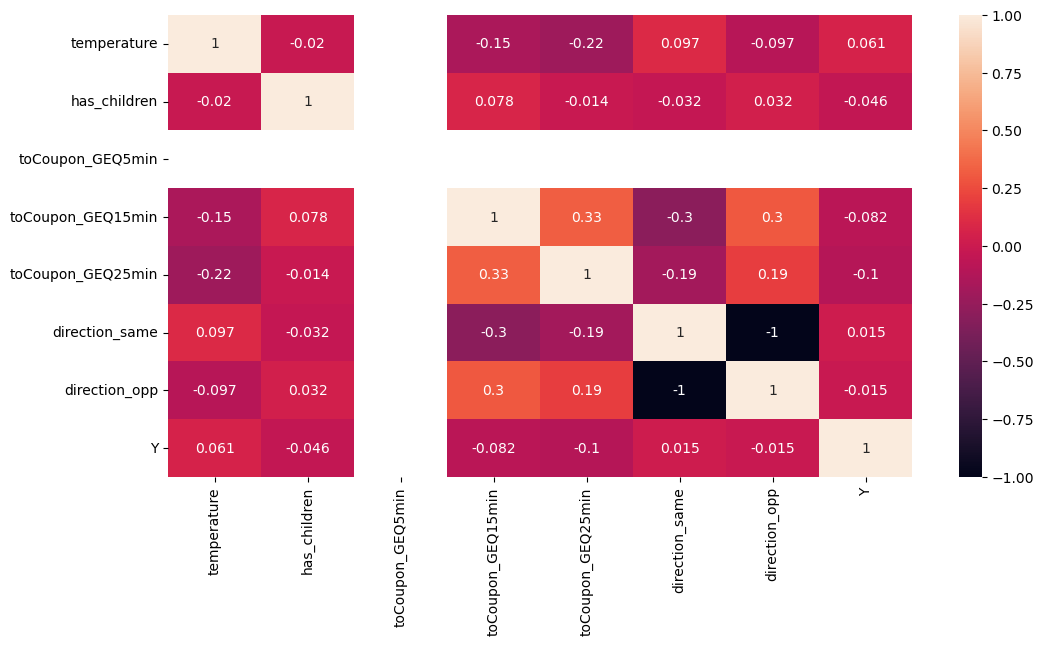

In [54]:
corr = data.corr(numeric_only=True).round(3)
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot= True)

In [56]:
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [59]:
# After the analysis of data there are a few conclusions I am deriving
# 1. For columns "car", "toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min" are not much of value 
# or are missing values
data.drop('car', axis=1, inplace=True)
# based on the correlation matrix, there is mostly negetive correlation 
data.drop('toCoupon_GEQ5min', axis=1, inplace=True)
data.drop('toCoupon_GEQ15min', axis=1, inplace=True)
data.drop('toCoupon_GEQ25min', axis=1, inplace=True)

#rename coulmns to make it more readable
data = data.rename(columns={'Y':'coupon_accepted'})

In [61]:
#fill the Null values for Bar, CoffeeHouse, CarryAway using median values
data["Bar"].fillna(data["Bar"].value_counts().idxmax(), inplace=True)
data["CoffeeHouse"].fillna(data["CoffeeHouse"].value_counts().idxmax(), inplace=True)
data["CarryAway"].fillna(data["CarryAway"].value_counts().idxmax(), inplace=True)

#fill the Null values for RestaurantLessThan20, Restaurant20To50 usint most popular values
data["RestaurantLessThan20"].fillna(data["RestaurantLessThan20"].value_counts().idxmax(), inplace=True)
data["Restaurant20To50"].fillna(data["Restaurant20To50"].value_counts().idxmax(), inplace=True)

# cleanup 'age' and 'Bar' column by replacing below21 by 20 and 50plus with 50 and make this column numeric
data['age'] = data['age'].replace('below21', '20').replace('50plus', '50')
data['age'] = pd.to_numeric(data['age'])
data['Bar'] = data['Bar'].replace('less1', 'never')
data['CarryAway'] = data['CarryAway'].replace('less1', 'never')
data['CoffeeHouse'] = data['CoffeeHouse'].replace('less1', 'never')

# cleanup marital_status and eliminate unneccassary 'partner' term 
data['maritalStatus'] = data['maritalStatus'].replace('Married partner', 'Married')
data['maritalStatus'] = data['maritalStatus'].replace('Unmarried partner', 'Unmarried')


data['coupon'] = data['coupon'].replace('Restaurant(<20)', 'Cheap Restaurant')
data['coupon'] = data['coupon'].replace('Restaurant(20-50)', 'Expensive Restaurant')



#naming consistency
data = data.rename(columns={'Bar':'bar', 'CoffeeHouse':'coffee_house',
                     'CarryAway': 'carry_away', 
                     'RestaurantLessThan20': 'resaturant_less_than_20',
                     'Restaurant20To50':'restaurant_20_to_50',
                     'maritalStatus': 'marital_status'})


In [63]:
data.isna().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
marital_status             0
has_children               0
education                  0
occupation                 0
income                     0
bar                        0
coffee_house               0
carry_away                 0
resaturant_less_than_20    0
restaurant_20_to_50        0
direction_same             0
direction_opp              0
coupon_accepted            0
dtype: int64

<Axes: >

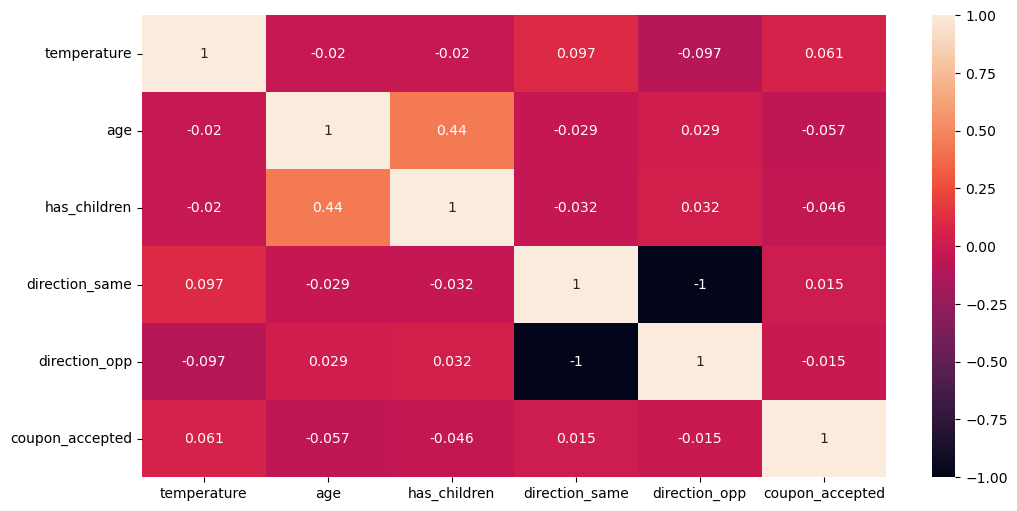

In [65]:
corr = data.corr(numeric_only=True).round(3)
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot= True)

In [67]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Cheap Restaurant         2786
Carry out & Take away    2393
Bar                      2017
Expensive Restaurant     1492
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 


In [70]:
coupons_used = data.query('coupon_accepted == 1')
accepted_coupon_count = coupons_used.shape[0]
print('Proportion of total acceptance of coupon is: %.2f%%' %((accepted_coupon_count/data.shape[0])*100))

Proportion of total acceptance of coupon is: 56.84%


5. Use a bar plot to visualize the `coupon` column.show

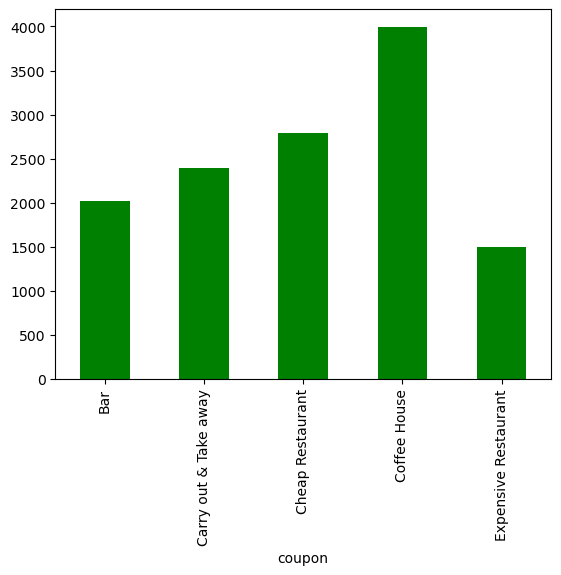

In [73]:
data.groupby('coupon')['coupon'].count().plot(kind='bar', color='green');

6. Use a histogram to visualize the temperature column.

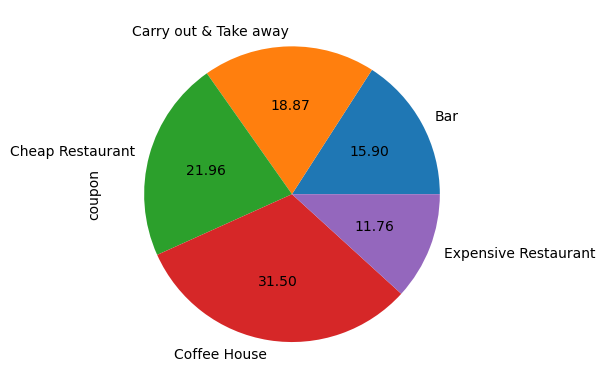

In [76]:
data.groupby('coupon')['coupon'].count().plot.pie(autopct='%.2f');

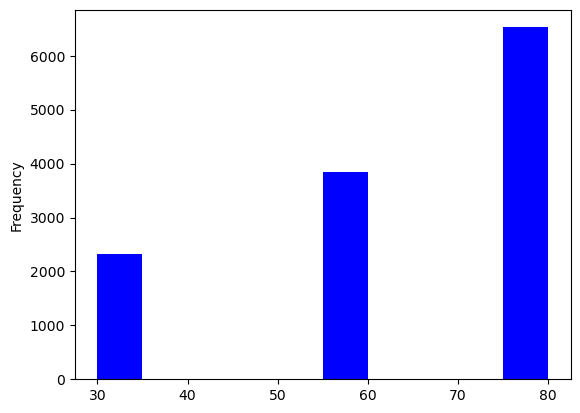

In [78]:
data['temperature'].plot(kind='hist', color='blue');

In [80]:
#Intentionally left blank
#========================

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [83]:
bar_data= data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [86]:
print('Proportion of bar coupons accepted: %.2f%%' %((bar_data.shape[0]/data.shape[0])*100))

Proportion of bar coupons accepted: 15.90%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [89]:
visited_bar_over_3_times = data.query('bar == "4~8" or bar == "gt8"')
accepted_coupon_over_3_visits = visited_bar_over_3_times.query('coupon_accepted == 1')['coupon_accepted'].count()
rate_over_3 = accepted_coupon_over_3_visits/ visited_bar_over_3_times.shape[0]*100

visited_bar_under_3_times = data.query('bar != "4~8" and bar != "gt8"')
accepted_coupon_under_3_visits = visited_bar_under_3_times.query('coupon_accepted == 1')['coupon_accepted'].count()
rate_under_3 = accepted_coupon_under_3_visits/visited_bar_under_3_times.shape[0]*100

print('Acceptance Rate for Bar coupons for customers-- ' )
print('Less than 3 visits: %.2f%%' %rate_under_3)  
print('Over 3 visits     : %.2f%%' %rate_over_3)  

Acceptance Rate for Bar coupons for customers-- 
Less than 3 visits: 56.16%
Over 3 visits     : 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [92]:
visited_bar_more_than_once = data.query('bar != "never" & bar != "less1" & age > 25 ')
rate_acceptance_more_than_once = visited_bar_more_than_once.query('coupon_accepted == 1')['coupon_accepted'].count()/ visited_bar_more_than_once.shape[0]*100

visited_bar_others = data.query('bar == "never" or bar == "less1" or age < 25 ')
rate_acceptance_others = visited_bar_others.query('coupon_accepted == 1')['coupon_accepted'].count()/ visited_bar_others.shape[0]*100


print('Acceptance Rate for bar coupons for customers--' )
print('More than once a month: %.2f%%' %rate_acceptance_more_than_once)  
print('Others                : %.2f%%' %rate_acceptance_others)  


Acceptance Rate for bar coupons for customers--
More than once a month: 62.15%
Others                : 55.35%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [95]:
visited_bar_more_than_once = data.query('bar != "never" & bar != "less1" & age > 25 ')
rate_acceptance_more_than_once = visited_bar_more_than_once.query('coupon_accepted == 1')['coupon_accepted'].count()/ visited_bar_more_than_once.shape[0]*100

visited_bar_others = data.query('bar == "never" or bar == "less1" or age < 25 ')
rate_acceptance_others = visited_bar_others.query('coupon_accepted == 1')['coupon_accepted'].count()/ visited_bar_others.shape[0]*100


print('Acceptance Rate for bar coupons for customers--' )
print('More than once a month: %.2f%%' %rate_acceptance_more_than_once)  
print('Others                : %.2f%%' %rate_acceptance_others)  


Acceptance Rate for bar coupons for customers--
More than once a month: 62.15%
Others                : 55.35%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [98]:
coupon_accepted = data.query('coupon_accepted==1')
visited_bar_more_than_once = coupon_accepted.query('bar != "never"')
query1 = visited_bar_more_than_once.query('passanger != "Kid(s)" & marital_status != "Widowed"')
query2 = visited_bar_more_than_once.query('age < 30')
query3 = visited_bar_more_than_once.query('income =="Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999" and coupon =="Cheap Restaurant"')

print('Acceptance Rate for bar coupons for customers--' )
#print('More than once a month: %.2f%%' %(query1.shape[0])/(coupon_accepted.shape[0])*100)  

print('Visit bar once a month with no kids and are not widowed : %.2f%%' %(query1.shape[0]/coupon_accepted.shape[0] * 100))
print('Visit bar once a month and are under age 30              : %.2f%%' %(query2.shape[0]/coupon_accepted.shape[0] * 100))
print('Visit a cheap restaurant 4 times a month and income less than 50K : %.2f%%' %(query3.shape[0]/coupon_accepted.shape[0] * 100))


Acceptance Rate for bar coupons for customers--
Visit bar once a month with no kids and are not widowed : 31.94%
Visit bar once a month and are under age 30              : 19.79%
Visit a cheap restaurant 4 times a month and income less than 50K : 14.24%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [101]:
# Customers who visit the bar more often tend to accept coupon more often than other categories

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [104]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,occupation,income,bar,coffee_house,carry_away,resaturant_less_than_20,restaurant_20_to_50,direction_same,direction_opp,coupon_accepted
0,No Urgent Place,Alone,Sunny,55,2PM,Cheap Restaurant,1d,Female,21,Unmarried,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0


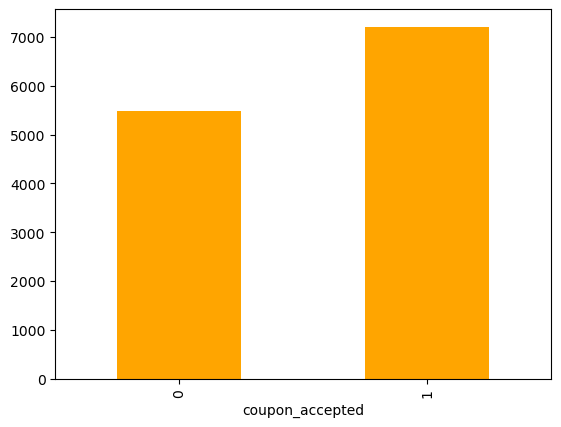

In [106]:
# Percentage of coupon accepted vs not accepted 
data.groupby('coupon_accepted')['coupon_accepted'].count().plot(kind='bar', color='orange');

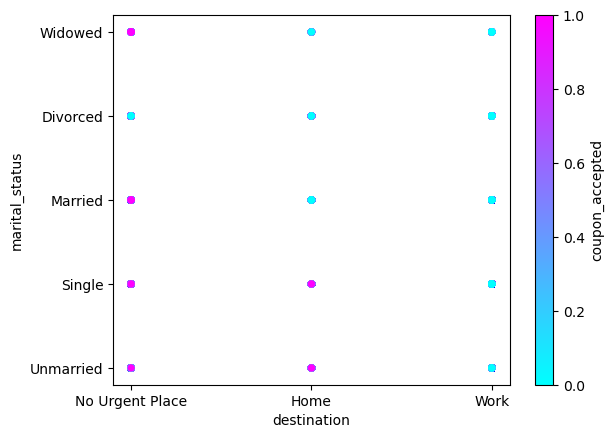

In [108]:
data_coupon_accepted = data.query('coupon_accepted == 1')
#data_coupon_accepted.groupby('maritalStatus','gender')['maritalStatus','gender'].agg('sum')

#customers = data_coupon_accepted.groupby(['maritalStatus','gender'])
# To identify colormaps use:
# from matplotlib import colormaps
# list(colormaps)
data.plot.scatter( x='destination', y='marital_status', c='coupon_accepted', colormap='cool');

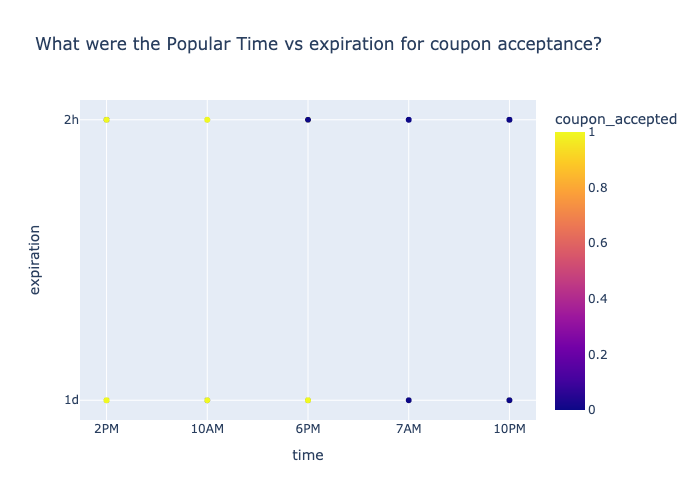

In [112]:
# Scatter chart using plotly
png = px.scatter(data, x= 'time', y='expiration', 
           color='coupon_accepted', 
           title='What were the Popular Time vs expiration for coupon acceptance?')
png.show("png")
# Seems like 2PM, 10AM, 6PM when the coupon was 1 day expiration

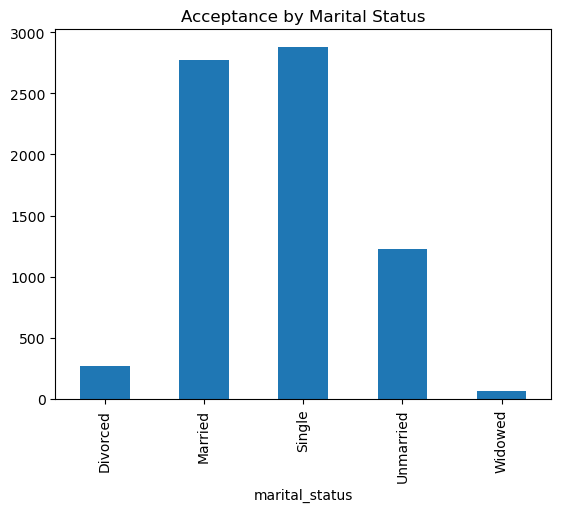

In [1296]:
data_coupon_accepted = data.query('coupon_accepted == 1')
data_coupon_accepted.groupby('marital_status')['marital_status'].count().plot(kind='bar',
                                                                              title='Acceptance by Marital Status');

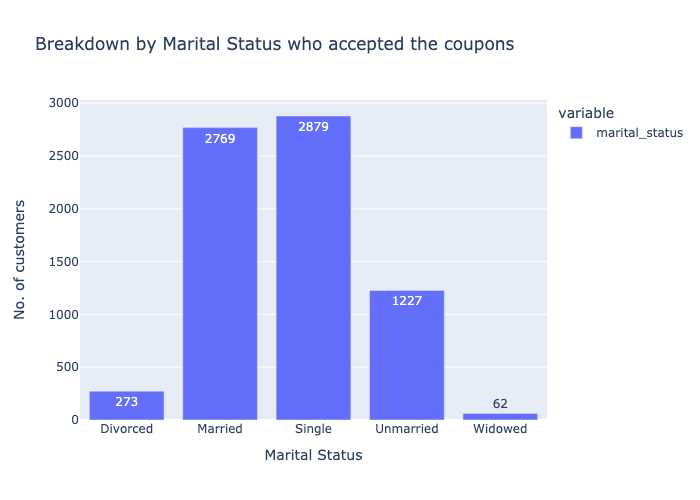

In [114]:
#Same chart as above just in plotly
fig = px.bar(data_coupon_accepted.groupby('marital_status')['marital_status'].count(),
       labels={'index':'Marital Status', 'value': 'No. of customers'},
       title='Breakdown by Marital Status who accepted the coupons', 
       text_auto=True
      )
fig.show("png")

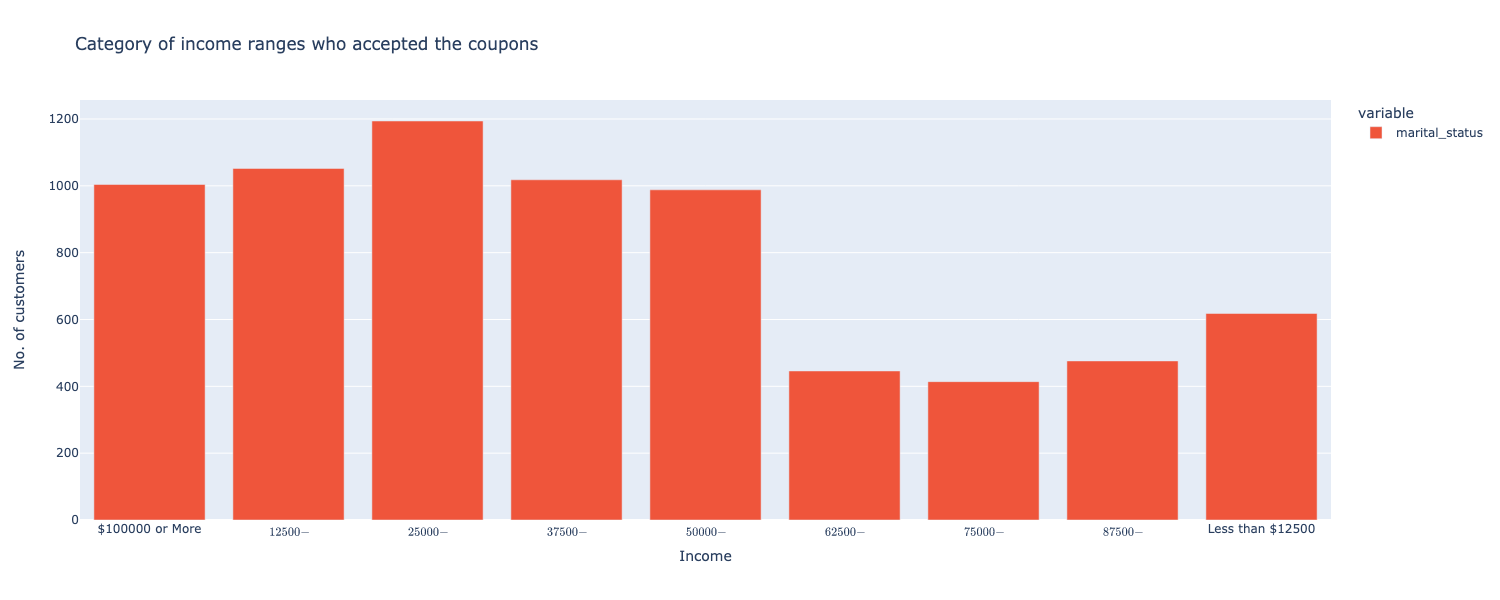

In [124]:
#Category of income ranges who accepted the coupons
fig = px.bar(data_coupon_accepted.groupby('income')['marital_status'].count(), 
       labels={'income':'Income', 'value': 'No. of customers'},
       title='Category of income ranges who accepted the coupons',
       width=1500, height=600,
       color_discrete_map={'income':'rouge'},
        
             
      )
fig.show("png")

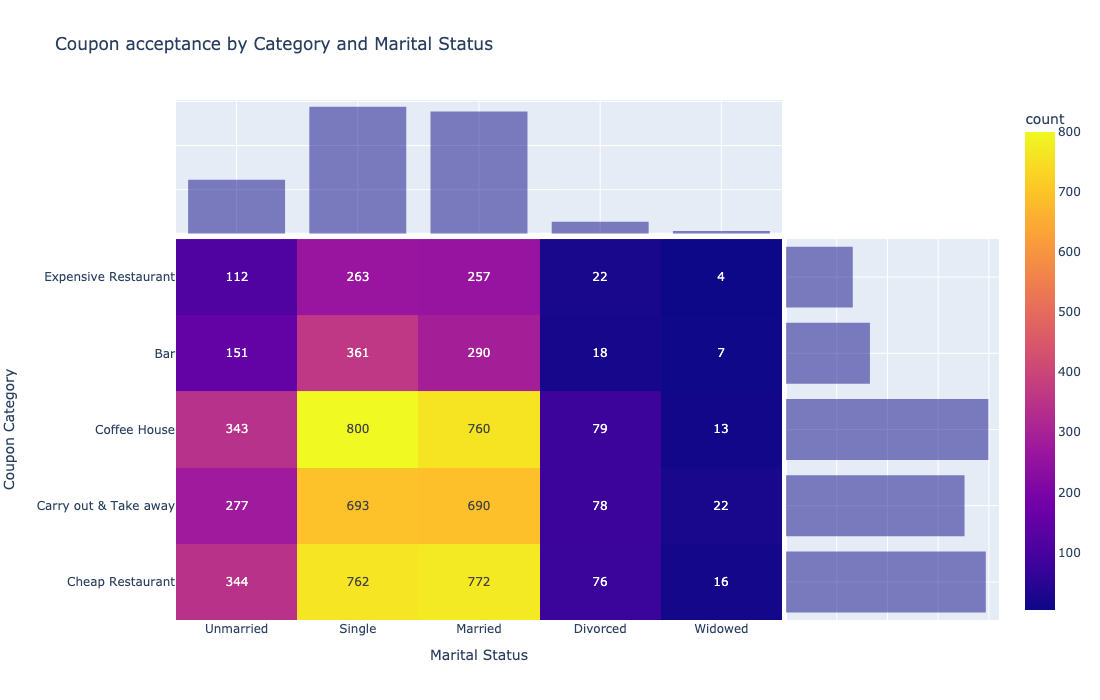

In [126]:
#Coupon acceptance by Category and Marital Status
data_coupon_accepted_restaurants = data_coupon_accepted[['marital_status','coupon', 'coupon_accepted']]
fig = px.density_heatmap(data_coupon_accepted_restaurants,
                   x= 'marital_status', y='coupon',
                   marginal_x = "histogram",
                   marginal_y = "histogram",
                   labels={'marital_status': 'Marital Status', 'coupon':'Coupon Category'},
                   title='Coupon acceptance by Category and Marital Status',
                   width=1100, height=700,
                   text_auto=True
                  )
fig.show("png")

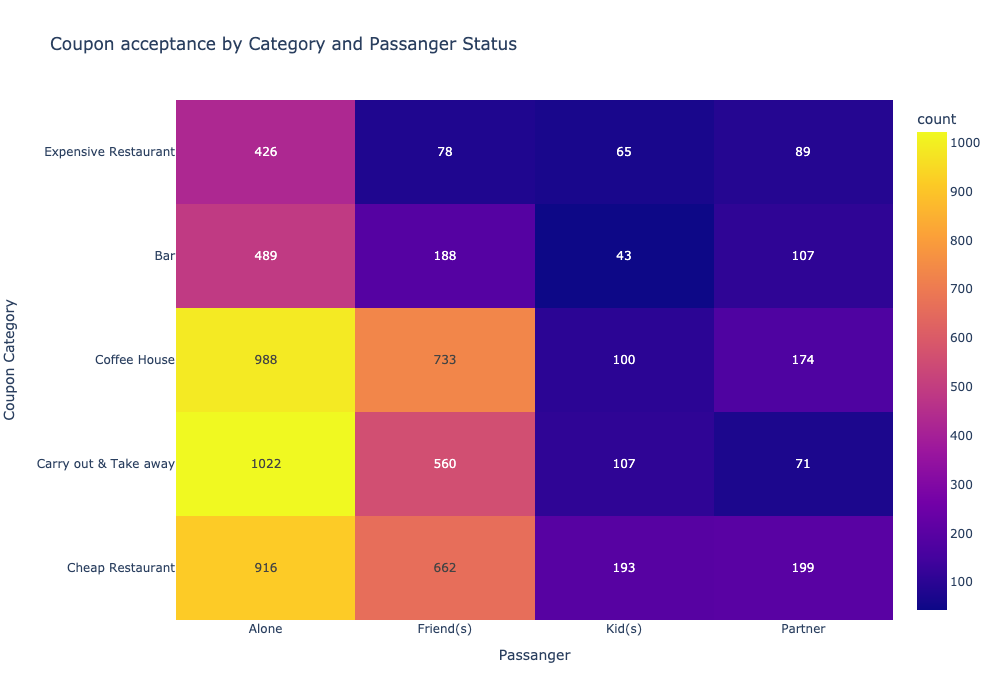

In [128]:
# Coupon acceptance by Category and Passanger Status
data_coupon_accepted_restaurants = data_coupon_accepted[['passanger','coupon', 'coupon_accepted']]
fig = px.density_heatmap(data_coupon_accepted_restaurants,
                   x= 'passanger', y='coupon',
                   labels={'passanger': 'Passanger', 'coupon':'Coupon Category'},
                   title='Coupon acceptance by Category and Passanger Status',
                   width=1000, height=700, text_auto=True
                  )
fig.show("png")

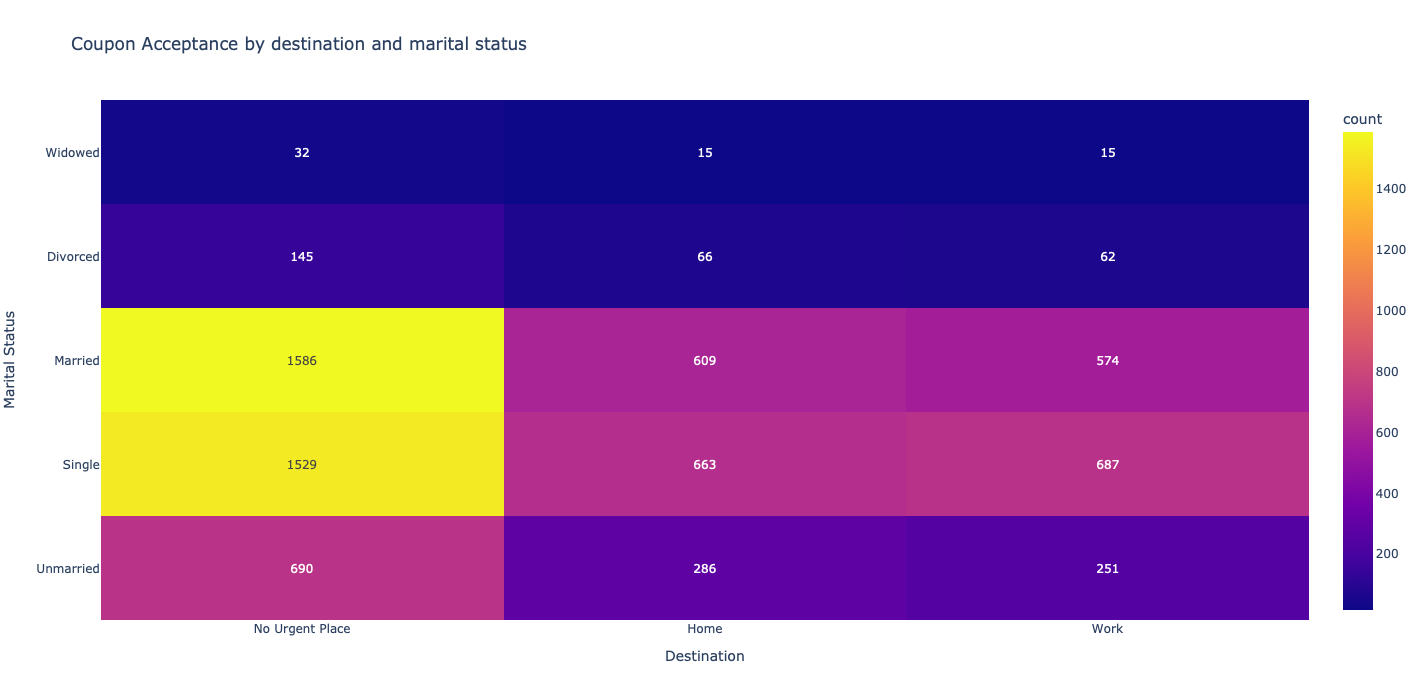

In [138]:
#Coupon Acceptance by destination and marital status
px.density_heatmap(data_coupon_accepted,
                   x= 'destination', y='marital_status',
                   labels={'destination': 'Destination', 'marital_status':'Marital Status'},
                   width=1000, height=700,
                   text_auto=True,
                   title = "Coupon Acceptance by destination and marital status"
                  )


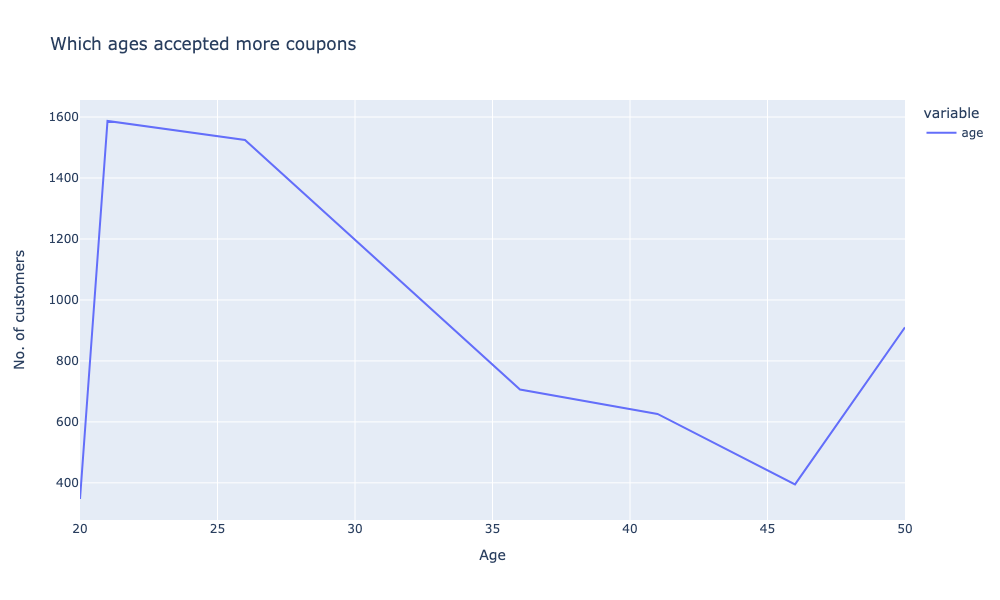

In [140]:
fig = px.line(data_coupon_accepted.groupby('age')['age'].count(), 
       labels={'index':'Age', 'value': 'No. of customers'},
       title='Which ages accepted more coupons',
       width=1000, height=600
      )
fig.show("png")

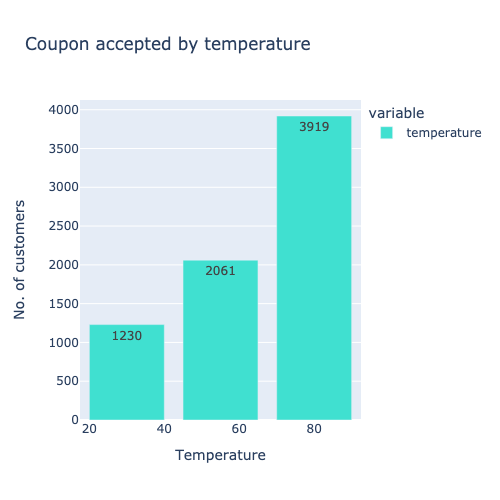

In [142]:
# Coupon accepted by temperature
fig = px.bar(data_coupon_accepted.groupby('temperature')['temperature'].count(), 
       labels={'index':'Temperature', 'value': 'No. of customers'},
       title='Coupon accepted by temperature',
       width=500, height=500, text_auto=True,
       color_discrete_map={'temperature':'turquoise'}
      )
fig.show("png")

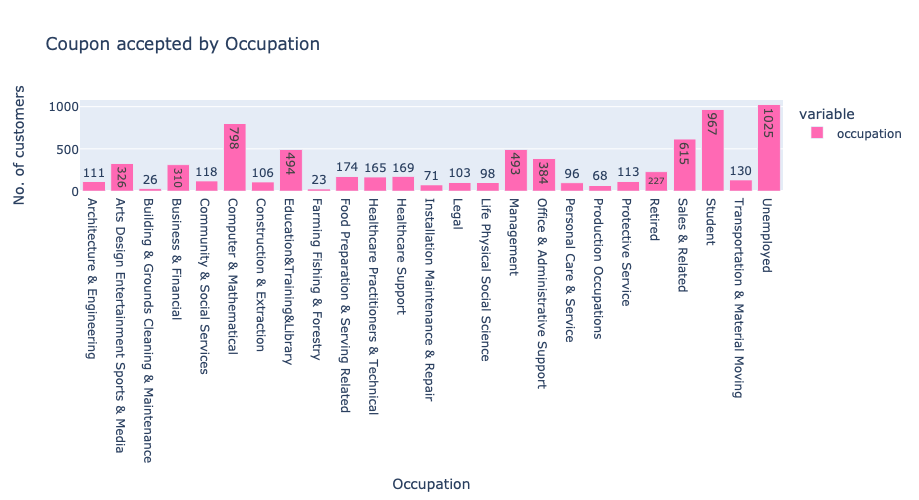

In [1340]:
# Coupon accepted by Occupation
fig = px.bar(data_coupon_accepted.groupby('occupation')['occupation'].count(), 
       labels={'index':'Occupation', 'value': 'No. of customers'},
       title='Coupon accepted by Occupation',
       width=1000, height=500, text_auto=True,
       color_discrete_map={'occupation':'hotpink'}
      )
fig.show(

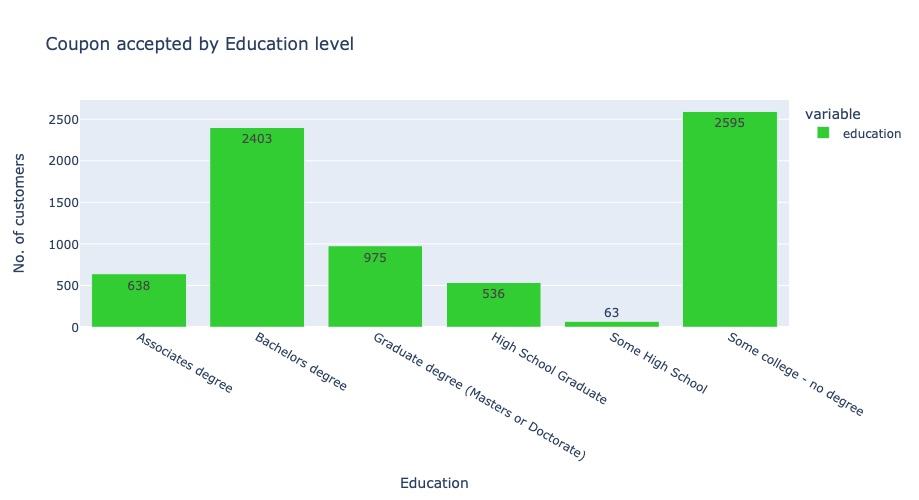

In [1346]:
px.bar(data_coupon_accepted.groupby('education')['education'].count(), 
       labels={'index':'Education', 'value': 'No. of customers'},
       title='Coupon accepted by Education level',
       width=800, height=500, text_auto=True, color_discrete_map={'education':'limegreen'}
      )